In [6]:
# Rates of Death with vax
#  https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/3rge-nu2a

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geobr

sns.set_theme(style="darkgrid")


pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 10)  # ao invés de none pode por INT do limite
#pd.set_option('display.max_colwidth', None)

df_faixa = pd.read_csv('../data/faixa_etaria_municipio.csv')
df_ox = pd.read_csv('../data/OxCGRT_Brazil_latest.csv', low_memory=False)


In [7]:
df_ox.dropna(axis=0, how='any', subset=['CityCode'], inplace=True)

df_cases_death = df_ox.loc[:,['CityCode', 'ConfirmedCases', 'ConfirmedDeaths']]

df_cases_death = df_cases_death.groupby(by=['CityCode']).max().reset_index()

df_cases_death[df_cases_death['ConfirmedDeaths'] == df_cases_death['ConfirmedDeaths'].max()]

,CityCode,ConfirmedCases,ConfirmedDeaths
40,BR_3550308,976214.0,39352.0


In [8]:
#set index pro q quer organizar
df_ox = df_ox.loc[:,['ConfirmedDeaths', 'CityName', 'CityCode','Date']].drop_duplicates()
df_ox = df_ox.set_index('CityName', 'Date')

/tmp/ipykernel_5854/270134362.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df_ox = df_ox.set_index('CityName', 'Date')


In [9]:
df_ox['NewDeaths'] = df_ox['ConfirmedDeaths'] - df_ox['ConfirmedDeaths'].shift(1)
df_ox = df_ox.reset_index().reset_index().drop(columns='index')


In [10]:
df_ox.iloc[550:560,:]

,CityName,ConfirmedDeaths,CityCode,Date,NewDeaths
550,Cruzeiro do Sul,155.0,BR_1200203,20210704,0.0
551,Cruzeiro do Sul,155.0,BR_1200203,20210705,0.0
552,Cruzeiro do Sul,155.0,BR_1200203,20210706,0.0
553,Cruzeiro do Sul,156.0,BR_1200203,20210707,1.0
554,Cruzeiro do Sul,156.0,BR_1200203,20210708,0.0
555,Cruzeiro do Sul,157.0,BR_1200203,20210709,1.0
556,Cruzeiro do Sul,156.0,BR_1200203,20210710,-1.0
557,Cruzeiro do Sul,156.0,BR_1200203,20210711,0.0
558,Cruzeiro do Sul,157.0,BR_1200203,20210712,1.0
559,Cruzeiro do Sul,157.0,BR_1200203,20210713,0.0


In [11]:
df_ox.loc[df_ox['NewDeaths'] < 0,'NewDeaths'] = 0

In [12]:
#Converte coluna Date de INT para DATETIME
df_ox['Date'] = pd.to_datetime(df_ox['Date'], format='%Y%m%d')

#organizar por data/cidade p depois dar slice
df_ox = df_ox.sort_values(by=['Date', 'CityName'])

df_ox

,CityName,ConfirmedDeaths,CityCode,Date,NewDeaths
20525,Ananindeua,NaN,BR_1500800,2020-01-01,NaN
12315,Aparecida de Goiania,NaN,BR_5201405,2020-01-01,NaN
39408,Aracaju,NaN,BR_2800308,2020-01-01,NaN
42692,Araguaina,NaN,BR_1702109,2020-01-01,NaN
1642,Arapiraca,NaN,BR_2700300,2020-01-01,NaN
...,...,...,...,...,...
42691,Sao Paulo,NaN,BR_3550308,2022-03-31,NaN
27913,Teresina,NaN,BR_2211001,2022-03-31,NaN
17240,Uberlandia,NaN,BR_3170206,2022-03-31,NaN
11493,Vila Velha,NaN,BR_3205200,2022-03-31,NaN


In [13]:
# Removerei 'sexo' porque, a princípio, não faz diferença no peso das mortes

df_cases_death.rename(columns={'CityCode':'CodMun'}, inplace=True)

df_faixa.loc[:,'CodEst'] = df_faixa['CodEst'].apply(str)

df_faixa.drop(columns=['Sexo'], inplace=True)

df = df_faixa.groupby(['CodMun','CodEst','NomeDoEstado','NomeDoMunicipio']).sum().reset_index()

df = df.merge(df_cases_death, on='CodMun')

In [14]:
# df[df['NomeDoMunicipio'] == 'Curitiba']

df['TotalHabitantes'] = df.iloc[:,4:-2].aggregate(axis=1,func=np.sum)

df['De 5 a 14 anos']  = df['De 5 a 9 anos'] + df['De 10 a 14 anos']
df['De 15 a 24 anos'] = df['De 15 a 19 anos'] + df['De 20 a 24 anos']
df['De 25 a 34 anos'] = df['De 25 a 29 anos'] + df['De 30 a 34 anos']
df['De 35 a 44 anos'] = df['De 35 a 39 anos'] + df['De 40 a 44 anos']
df['De 45 a 54 anos'] = df['De 45 a 49 anos'] + df['De 50 a 54 anos']
df['De 55 a 64 anos'] = df['De 55 a 59 anos'] + df['De 60 a 64 anos']
df['De 65 a 74 anos'] = df['De 65 a 69 anos'] + df['De 70 a 74 anos']
df['De 75 anos ou mais'] = df['De 75 a 79 anos'] + df['De 80 anos ou mais']

df.drop(columns=['De 5 a 9 anos','De 10 a 14 anos',
'De 15 a 19 anos','De 20 a 24 anos',
'De 25 a 29 anos','De 30 a 34 anos',
'De 35 a 39 anos','De 40 a 44 anos',
'De 45 a 49 anos','De 50 a 54 anos',
'De 55 a 59 anos','De 60 a 64 anos',
'De 65 a 69 anos','De 70 a 74 anos',
'De 75 a 79 anos', 'De 80 anos ou mais'], inplace=True)

df


,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284
50,BR_5107602,51,Mato Grosso,Rondonópolis,17785,44021.0,974.0,236067,35665,35460,41104,38627,30231,20304,10941,5950
51,BR_5201405,52,Goiás,Aparecida de Goiânia,47599,97514.0,1780.0,590146,91548,100838,105886,95674,70006,45310,22762,10523
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631


In [15]:

col_names = [
    ['De 0 a 4 anos', 0.00038],
    ['De 5 a 14 anos', 0.00031],
    ['De 15 a 24 anos', 0.00264],
    ['De 25 a 34 anos', 0.01112],
    ['De 35 a 44 anos', 0.02770],
    ['De 45 a 54 anos', 0.06675],
    ['De 55 a 64 anos', 0.14701],
    ['De 65 a 74 anos', 0.22999],
    ['De 75 anos ou mais', 0.51411]
]

# até 54 anos é jovem calcular porcentagem

for col, rate in col_names:
    df['Weighted Rate ' + col] = \
        df.apply(lambda row: row['ConfirmedDeaths'] * rate / row[col] * 100000 \
            * row[col] / row['TotalHabitantes'] \
                , axis=1)

df

,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040,0.178295,0.145451,1.238683,5.217485,12.996793,31.318986,68.976840,107.910914,241.219531
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600,0.176841,0.144265,1.228581,5.174931,12.890792,31.063550,68.414270,107.030800,239.252161
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225,0.100189,0.081733,0.696051,2.931851,7.303262,17.599016,38.760020,60.638168,135.548017
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896,0.162712,0.132739,1.130419,4.761463,11.860839,28.581624,62.948082,98.479215,220.136307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284,0.225411,0.183888,1.566016,6.596250,16.431307,39.595297,87.204563,136.427301,304.963867
50,BR_5107602,51,Mato Grosso,Rondonópolis,17785,44021.0,974.0,236067,35665,35460,41104,38627,30231,20304,10941,5950,0.156786,0.127904,1.089250,4.588053,11.428874,27.540698,60.655551,94.892662,212.119076
51,BR_5201405,52,Goiás,Aparecida de Goiânia,47599,97514.0,1780.0,590146,91548,100838,105886,95674,70006,45310,22762,10523,0.114616,0.093502,0.796278,3.354017,8.354882,20.133153,44.341197,69.369648,155.066001
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631,0.171113,0.139592,1.188784,5.007304,12.473229,30.057330,66.198174,103.563826,231.502234


In [16]:
df['Weighted Death Rate per 100k'] = df.iloc[:,-9:].aggregate(axis=1,func=np.sum)

df

,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais,Weighted Death Rate per 100k
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040,0.178295,0.145451,1.238683,5.217485,12.996793,31.318986,68.976840,107.910914,241.219531,469.202978
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600,0.176841,0.144265,1.228581,5.174931,12.890792,31.063550,68.414270,107.030800,239.252161,465.376191
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038,188.613347
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225,0.100189,0.081733,0.696051,2.931851,7.303262,17.599016,38.760020,60.638168,135.548017,263.658307
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896,0.162712,0.132739,1.130419,4.761463,11.860839,28.581624,62.948082,98.479215,220.136307,428.193399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284,0.225411,0.183888,1.566016,6.596250,16.431307,39.595297,87.204563,136.427301,304.963867,593.193900
50,BR_5107602,51,Mato Grosso,Rondonópolis,17785,44021.0,974.0,236067,35665,35460,41104,38627,30231,20304,10941,5950,0.156786,0.127904,1.089250,4.588053,11.428874,27.540698,60.655551,94.892662,212.119076,412.598855
51,BR_5201405,52,Goiás,Aparecida de Goiânia,47599,97514.0,1780.0,590146,91548,100838,105886,95674,70006,45310,22762,10523,0.114616,0.093502,0.796278,3.354017,8.354882,20.133153,44.341197,69.369648,155.066001,301.623293
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631,0.171113,0.139592,1.188784,5.007304,12.473229,30.057330,66.198174,103.563826,231.502234,450.301587


In [17]:
# Define a porcentagem de cada categoria etaria

aux = ['De 0 a 4 anos','De 5 a 14 anos', \
    'De 15 a 24 anos','De 25 a 34 anos','De 35 a 44 anos',\
        'De 45 a 54 anos','De 55 a 64 anos','De 65 a 74 anos','De 75 anos ou mais']

for c in aux:
    df[c[3:]] = df.apply(lambda x: x[c]/x['TotalHabitantes'] * 100, axis=1)

df.sort_values('Weighted Death Rate per 100k', ascending=False)

df.to_csv('../data/df_fx_etaria_mortes.csv', index=False)


In [18]:
regdf=pd.read_csv('../data/regiao.csv')

regdf.drop(columns=['Estado', 'Sigla'], inplace=True)

regdf['CodEst'] = regdf['CodEst'].astype(str)

df = df.merge(how='left', left_on='CodEst', right_on='CodEst', right=regdf)
df

,CodMun,CodEst,NomeDoEstado,NomeDoMunicipio,De 0 a 4 anos,ConfirmedCases,ConfirmedDeaths,TotalHabitantes,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais,Weighted Death Rate per 100k,0 a 4 anos,5 a 14 anos,15 a 24 anos,25 a 34 anos,35 a 44 anos,45 a 54 anos,55 a 64 anos,65 a 74 anos,75 anos ou mais,Regiao
0,BR_1100122,11,Rondônia,Ji-Paraná,9340,20399.0,610.0,130009,19290,21088,22439,20398,16343,11942,6129,3040,0.178295,0.145451,1.238683,5.217485,12.996793,31.318986,68.976840,107.910914,241.219531,469.202978,7.184118,14.837434,16.220416,17.259574,15.689683,12.570668,9.185518,4.714289,2.338300,Norte
1,BR_1100205,11,Rondônia,Porto Velho,40615,86593.0,2510.0,539354,82088,96761,100990,88911,62088,41886,18415,7600,0.176841,0.144265,1.228581,5.174931,12.890792,31.063550,68.414270,107.030800,239.252161,465.376191,7.530305,15.219689,17.940165,18.724252,16.484721,11.511549,7.765957,3.414270,1.409093,Norte
2,BR_1200203,12,Acre,Cruzeiro do Sul,8776,7903.0,168.0,89072,18320,18174,14530,12295,7667,4584,2779,1947,0.071672,0.058470,0.497934,2.097359,5.224537,12.589815,27.727771,43.378750,96.967038,188.613347,9.852703,20.567631,20.403718,16.312646,13.803440,8.607643,5.146398,3.119948,2.185872,Norte
3,BR_1200401,12,Acre,Rio Branco,31122,38206.0,1090.0,413418,72485,82213,70770,63302,43250,27205,14846,8225,0.100189,0.081733,0.696051,2.931851,7.303262,17.599016,38.760020,60.638168,135.548017,263.658307,7.527974,17.533102,19.886168,17.118268,15.311864,10.461567,6.580507,3.591039,1.989512,Norte
4,BR_1302603,13,Amazonas,Manaus,173066,206015.0,9504.0,2219580,378486,411118,383323,354773,246929,154338,78651,38896,0.162712,0.132739,1.130419,4.761463,11.860839,28.581624,62.948082,98.479215,220.136307,428.193399,7.797241,17.052145,18.522333,17.270069,15.983790,11.125033,6.953478,3.543508,1.752404,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,BR_5103403,51,Mato Grosso,Cuiabá,43237,128771.0,3665.0,617848,88638,89717,104113,104999,78507,59536,32817,16284,0.225411,0.183888,1.566016,6.596250,16.431307,39.595297,87.204563,136.427301,304.963867,593.193900,6.998000,14.346247,14.520885,16.850908,16.994309,12.706523,9.636027,5.311501,2.635600,Centro-Oeste
50,BR_5107602,51,Mato Grosso,Rondonópolis,17785,44021.0,974.0,236067,35665,35460,41104,38627,30231,20304,10941,5950,0.156786,0.127904,1.089250,4.588053,11.428874,27.540698,60.655551,94.892662,212.119076,412.598855,7.533878,15.107999,15.021159,17.412006,16.362728,12.806110,8.600948,4.634701,2.520471,Centro-Oeste
51,BR_5201405,52,Goiás,Aparecida de Goiânia,47599,97514.0,1780.0,590146,91548,100838,105886,95674,70006,45310,22762,10523,0.114616,0.093502,0.796278,3.354017,8.354882,20.133153,44.341197,69.369648,155.066001,301.623293,8.065631,15.512771,17.086958,17.942340,16.211920,11.862488,7.677761,3.857012,1.783118,Centro-Oeste
52,BR_5208707,52,Goiás,Goiânia,94476,212948.0,6917.0,1536097,206782,223930,261063,264780,196469,148534,90432,49631,0.171113,0.139592,1.188784,5.007304,12.473229,30.057330,66.198174,103.563826,231.502234,450.301587,6.150393,13.461520,14.577855,16.995216,17.237193,12.790143,9.669572,5.887128,3.230981,Centro-Oeste


In [19]:
#identificar um ano especifico 
df_ox2021 = df_ox#.loc[df_ox['Date'].dt.year == 2021]

In [20]:
df_newD = df_ox2021.loc[:,['CityName', 'CityCode', 'Date', 'NewDeaths']].drop_duplicates() \
    .merge(
    how='left',
    right=df.loc[:,['CodMun', 'NomeDoEstado', 'CodEst', 'Regiao', 'De 0 a 4 anos', 'De 5 a 14 anos', \
        'De 15 a 24 anos','De 25 a 34 anos','De 35 a 44 anos',\
        'De 45 a 54 anos','De 55 a 64 anos','De 65 a 74 anos','De 75 anos ou mais',\
        'TotalHabitantes'\
        ]],
    left_on='CityCode', right_on='CodMun')

df_newD

,CityName,CityCode,Date,NewDeaths,CodMun,NomeDoEstado,CodEst,Regiao,De 0 a 4 anos,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,TotalHabitantes
0,Ananindeua,BR_1500800,2020-01-01,NaN,BR_1500800,Pará,15,Norte,33506,79182,95610,92045,88533,66756,44541,24313,11061,535547
1,Aparecida de Goiania,BR_5201405,2020-01-01,NaN,BR_5201405,Goiás,52,Centro-Oeste,47599,91548,100838,105886,95674,70006,45310,22762,10523,590146
2,Aracaju,BR_2800308,2020-01-01,NaN,BR_2800308,Sergipe,28,Nordeste,40201,91713,106552,112219,114355,84249,60412,35946,19261,664908
3,Araguaina,BR_1702109,2020-01-01,NaN,BR_1702109,Tocantins,17,Norte,13440,30350,33805,33985,28627,19398,12176,7178,4422,183381
4,Arapiraca,BR_2700300,2020-01-01,NaN,BR_2700300,Alagoas,27,Nordeste,16253,36205,42658,38445,34868,27021,18589,11876,7132,233047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44329,Sao Paulo,BR_3550308,2022-03-31,NaN,BR_3550308,São Paulo,35,Sudeste,785654,1566869,1793378,1892654,2013405,1609018,1280655,840831,542768,12325232
44330,Teresina,BR_2211001,2022-03-31,NaN,BR_2211001,Piauí,22,Nordeste,53927,123862,154908,144131,141131,104080,77746,45126,23164,868075
44331,Uberlandia,BR_3170206,2022-03-31,NaN,BR_3170206,Minas Gerais,31,Sudeste,41863,88569,107120,114697,112710,90253,74153,44185,25547,699097
44332,Vila Velha,BR_3205200,2022-03-31,NaN,BR_3205200,Espírito Santo,32,Sudeste,31620,64313,73626,80126,81156,63616,54523,32584,19761,501325


In [21]:
#Separa o dataset em trimestres
semanas = [part for _, part in df_newD.groupby(pd.Grouper(key='Date',freq='W'))]

semanas[1]

,CityName,CityCode,Date,NewDeaths,CodMun,NomeDoEstado,CodEst,Regiao,De 0 a 4 anos,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,TotalHabitantes
270,Ananindeua,BR_1500800,2020-01-06,NaN,BR_1500800,Pará,15,Norte,33506,79182,95610,92045,88533,66756,44541,24313,11061,535547
271,Aparecida de Goiania,BR_5201405,2020-01-06,NaN,BR_5201405,Goiás,52,Centro-Oeste,47599,91548,100838,105886,95674,70006,45310,22762,10523,590146
272,Aracaju,BR_2800308,2020-01-06,NaN,BR_2800308,Sergipe,28,Nordeste,40201,91713,106552,112219,114355,84249,60412,35946,19261,664908
273,Araguaina,BR_1702109,2020-01-06,NaN,BR_1702109,Tocantins,17,Norte,13440,30350,33805,33985,28627,19398,12176,7178,4422,183381
274,Arapiraca,BR_2700300,2020-01-06,NaN,BR_2700300,Alagoas,27,Nordeste,16253,36205,42658,38445,34868,27021,18589,11876,7132,233047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Sao Paulo,BR_3550308,2020-01-12,NaN,BR_3550308,São Paulo,35,Sudeste,785654,1566869,1793378,1892654,2013405,1609018,1280655,840831,542768,12325232
644,Teresina,BR_2211001,2020-01-12,NaN,BR_2211001,Piauí,22,Nordeste,53927,123862,154908,144131,141131,104080,77746,45126,23164,868075
645,Uberlandia,BR_3170206,2020-01-12,NaN,BR_3170206,Minas Gerais,31,Sudeste,41863,88569,107120,114697,112710,90253,74153,44185,25547,699097
646,Vila Velha,BR_3205200,2020-01-12,NaN,BR_3205200,Espírito Santo,32,Sudeste,31620,64313,73626,80126,81156,63616,54523,32584,19761,501325


In [22]:
col_names = [
    ['De 0 a 4 anos', 0.00038],
    ['De 5 a 14 anos', 0.00031],
    ['De 15 a 24 anos', 0.00264],
    ['De 25 a 34 anos', 0.01112],
    ['De 35 a 44 anos', 0.02770],
    ['De 45 a 54 anos', 0.06675],
    ['De 55 a 64 anos', 0.14701],
    ['De 65 a 74 anos', 0.22999],
    ['De 75 anos ou mais', 0.51411]
]

# até 54 anos é jovem calcular porcentagem

for k, v in enumerate(semanas):
    semanas[k] = \
        semanas[k].groupby('CityName').max().reset_index().drop(columns=['NewDeaths']).merge(
            how='left',
            right=semanas[k].loc[:,['CityName','NewDeaths']].groupby('CityName').sum().reset_index(),
            left_on='CityName',
            right_on='CityName'
        )

    for col, rate in col_names:
        semanas[k]['Weighted Rate ' + col] = \
            semanas[k].apply(lambda row: row['NewDeaths'] * rate / row[col] * 100000 \
                * row[col] / row['TotalHabitantes'] \
                    , axis=1)

    semanas[k]['Morte ponderada por 100 mil'] = semanas[k].iloc[:,-9:].aggregate(axis=1,func=np.sum)

In [23]:
semanas[1]

,CityName,CityCode,Date,CodMun,NomeDoEstado,CodEst,Regiao,De 0 a 4 anos,De 5 a 14 anos,De 15 a 24 anos,De 25 a 34 anos,De 35 a 44 anos,De 45 a 54 anos,De 55 a 64 anos,De 65 a 74 anos,De 75 anos ou mais,TotalHabitantes,NewDeaths,Weighted Rate De 0 a 4 anos,Weighted Rate De 5 a 14 anos,Weighted Rate De 15 a 24 anos,Weighted Rate De 25 a 34 anos,Weighted Rate De 35 a 44 anos,Weighted Rate De 45 a 54 anos,Weighted Rate De 55 a 64 anos,Weighted Rate De 65 a 74 anos,Weighted Rate De 75 anos ou mais,Morte ponderada por 100 mil
0,Ananindeua,BR_1500800,2020-01-12,BR_1500800,Pará,15,Norte,33506,79182,95610,92045,88533,66756,44541,24313,11061,535547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aparecida de Goiania,BR_5201405,2020-01-12,BR_5201405,Goiás,52,Centro-Oeste,47599,91548,100838,105886,95674,70006,45310,22762,10523,590146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aracaju,BR_2800308,2020-01-12,BR_2800308,Sergipe,28,Nordeste,40201,91713,106552,112219,114355,84249,60412,35946,19261,664908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Araguaina,BR_1702109,2020-01-12,BR_1702109,Tocantins,17,Norte,13440,30350,33805,33985,28627,19398,12176,7178,4422,183381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arapiraca,BR_2700300,2020-01-12,BR_2700300,Alagoas,27,Nordeste,16253,36205,42658,38445,34868,27021,18589,11876,7132,233047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,Sao Paulo,BR_3550308,2020-01-12,BR_3550308,São Paulo,35,Sudeste,785654,1566869,1793378,1892654,2013405,1609018,1280655,840831,542768,12325232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,Teresina,BR_2211001,2020-01-12,BR_2211001,Piauí,22,Nordeste,53927,123862,154908,144131,141131,104080,77746,45126,23164,868075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,Uberlandia,BR_3170206,2020-01-12,BR_3170206,Minas Gerais,31,Sudeste,41863,88569,107120,114697,112710,90253,74153,44185,25547,699097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,Vila Velha,BR_3205200,2020-01-12,BR_3205200,Espírito Santo,32,Sudeste,31620,64313,73626,80126,81156,63616,54523,32584,19761,501325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
death_per_week = pd.concat(semanas).reset_index().drop(columns=['index'])

In [25]:
dates = []
for k,v in enumerate(death_per_week['Date'].unique()):
    o = {}
    o['Date'] = v
    o['SemanaEpidemiologica'] = k + 1
    dates.append(o)

dates = pd.DataFrame(dates)

In [26]:
death_per_week = death_per_week.merge(
    how='left',
    right=dates,
    left_on='Date',
    right_on='Date')

In [27]:
d = death_per_week.loc[:,['CityName','SemanaEpidemiologica','Morte ponderada por 100 mil', 'Regiao']].sort_values(['Regiao','CityName']).reset_index()

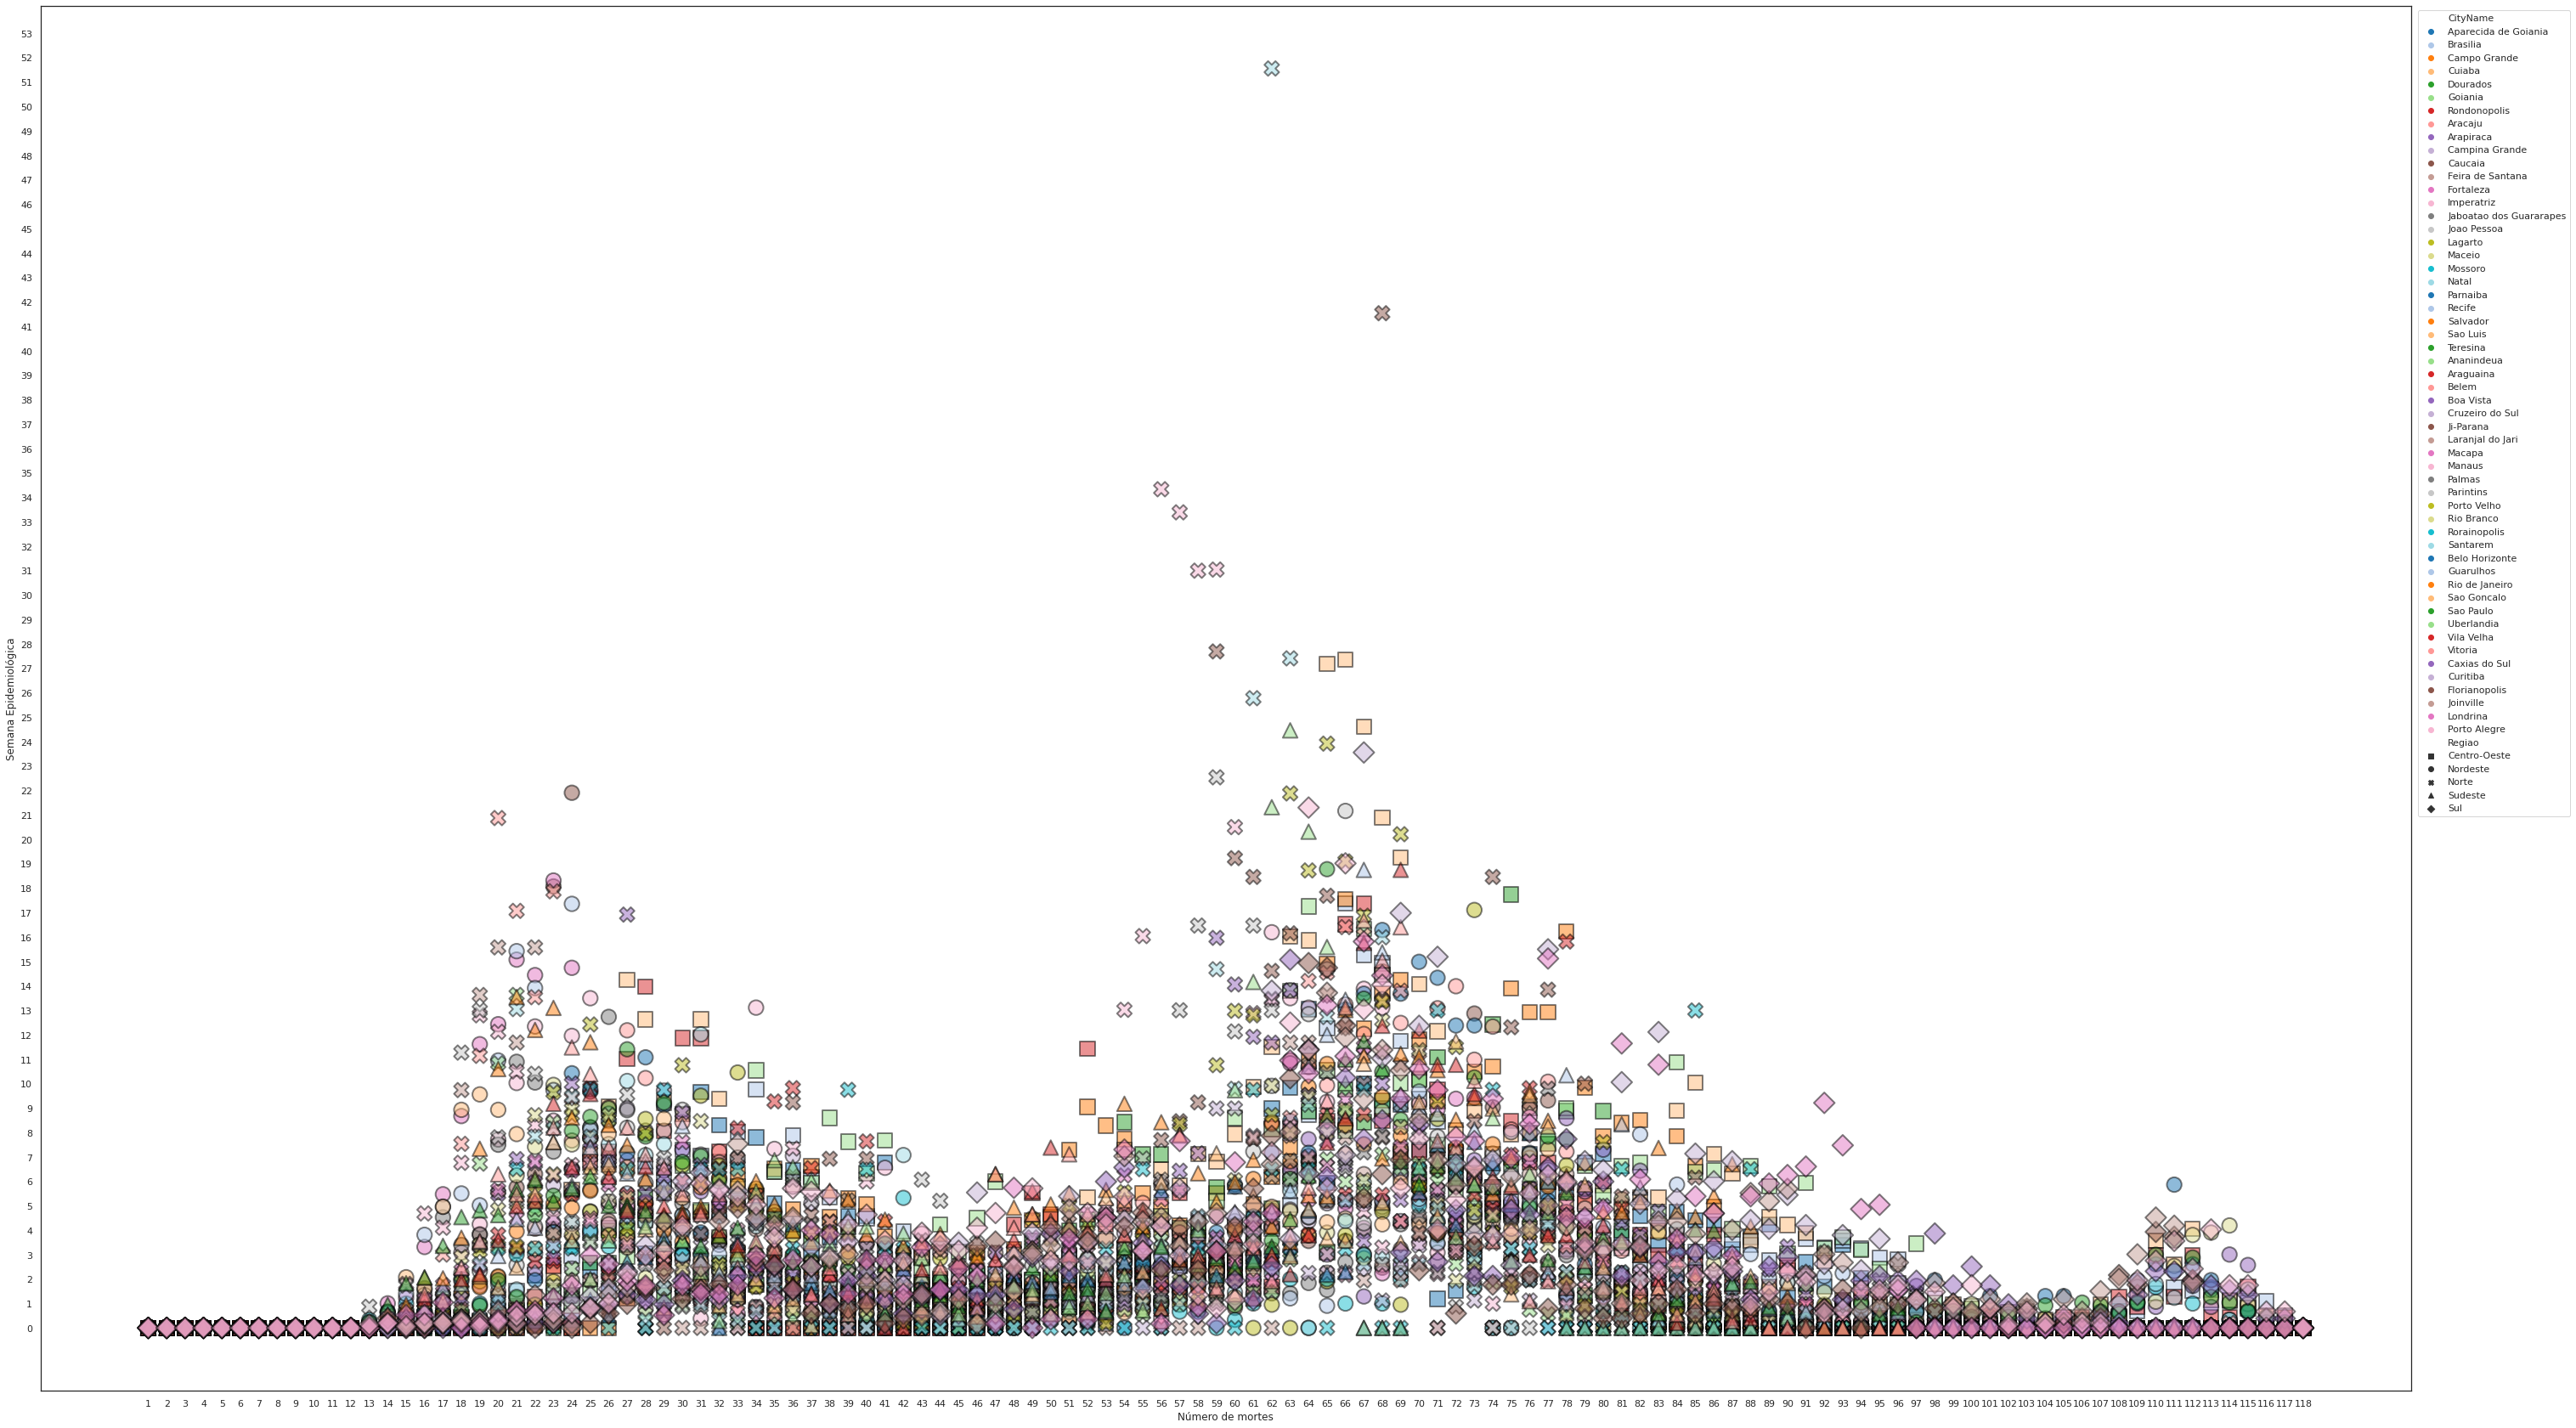

In [28]:
sns.set(rc={"figure.figsize":(50, 30)})
sns.set_theme(style="white")

p = sns.scatterplot(data=d, \
    x='SemanaEpidemiologica', y='Morte ponderada por 100 mil', \
        hue='CityName', palette='tab20', alpha=0.5, s=300, \
            style='Regiao', markers=['s','o','X','^','D'], \
                linewidth=2, edgecolor='black')

p.set_yticks(range(0,54,1))
p.set_xticks(range(1,119,1))
p.legend(loc='upper center', bbox_to_anchor=(1.035, 1.0))
p.set_ylabel('Semana Epidemiológica')
p.set_xlabel('Número de mortes')
p.set_facecolor('white')

In [29]:
perfil_et_reg = df.loc[:,['De 0 a 4 anos','De 5 a 14 anos', \
    'De 15 a 24 anos','De 25 a 34 anos','De 35 a 44 anos',\
        'De 45 a 54 anos','De 55 a 64 anos','De 65 a 74 anos','De 75 anos ou mais','TotalHabitantes','Regiao']].groupby('Regiao').sum().reset_index()

In [30]:
aux = ['De 0 a 4 anos','De 5 a 14 anos', \
    'De 15 a 24 anos','De 25 a 34 anos','De 35 a 44 anos',\
        'De 45 a 54 anos','De 55 a 64 anos','De 65 a 74 anos','De 75 anos ou mais']

for c in aux:
    perfil_et_reg[c[3:]] = perfil_et_reg.apply(lambda x: x[c]/x['TotalHabitantes'] * 100, axis=1)

Text(0, 0.5, '')

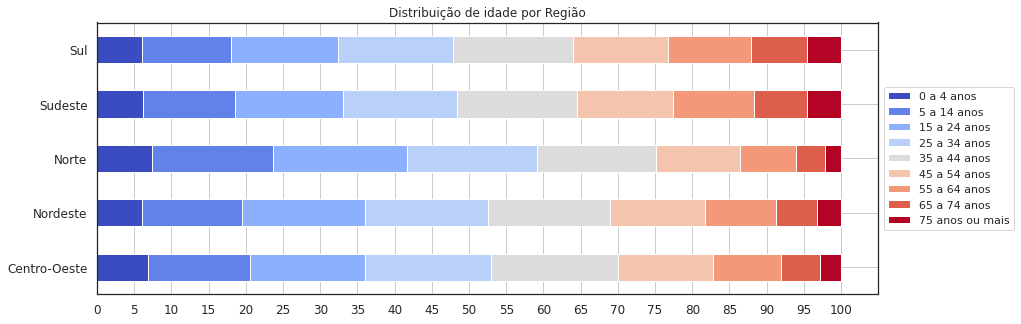

In [31]:
perfil_et_reg.loc[:,['Regiao', '0 a 4 anos','5 a 14 anos', \
    '15 a 24 anos','25 a 34 anos','35 a 44 anos',\
        '45 a 54 anos','55 a 64 anos','65 a 74 anos','75 anos ou mais']]\
            .plot(kind='barh', stacked=True, x='Regiao', grid=True,\
                fontsize=12,figsize=(14,5), xlabel='Região',\
                    title='Distribuição de idade por Região', colormap='coolwarm')\
                        .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xticks(range(0,101,5))
plt.ylabel('')

In [32]:
ratiodf = df.loc[:,['Weighted Death Rate per 100k', 'Regiao']].groupby('Regiao').mean().reset_index()
hab = df.loc[:,['TotalHabitantes', 'Weighted Death Rate per 100k', 'Regiao']].groupby('Regiao').sum().reset_index()

hab.rename(columns={'Weighted Death Rate per 100k':'Total de mortes'}, inplace=True)

ratiodf = ratiodf.merge(right=hab, how='left', left_on='Regiao', right_on='Regiao')

ratiodf.rename(columns={'Weighted Death Rate per 100k':'Media de mortes'}, inplace=True)



In [33]:
citycount= df['Regiao'].value_counts().reset_index()

citycount.rename(columns={'Regiao':'Cidades Avaliadas'}, inplace=True)

In [34]:
ratiodf = ratiodf.merge(how='left', left_on='Regiao', right_on='index', right=citycount).drop(columns=['index'])

In [35]:
ratiodf

,Regiao,Media de mortes,TotalHabitantes,Total de mortes,Cidades Avaliadas
0,Centro-Oeste,408.424979,7166894,2858.974854,7
1,Nordeste,283.649292,15757280,5105.687264,18
2,Norte,305.422641,7352839,4581.339616,15
3,Sudeste,358.319041,25644746,2866.552325,8
4,Sul,350.544849,5636206,2103.269093,6


Text(0.5, 0, 'População')

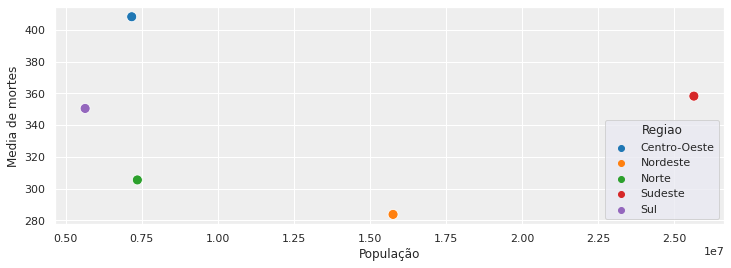

In [36]:

sns.set(rc={"figure.figsize":(12, 4)})

p = sns.scatterplot(data=ratiodf, x='TotalHabitantes', y='Media de mortes',\
    hue='Regiao', palette='tab10', s=100)

p.set_facecolor('#eeeeee')
p.set_xlabel('População')

Text(0, 0.5, 'Número de mortes')

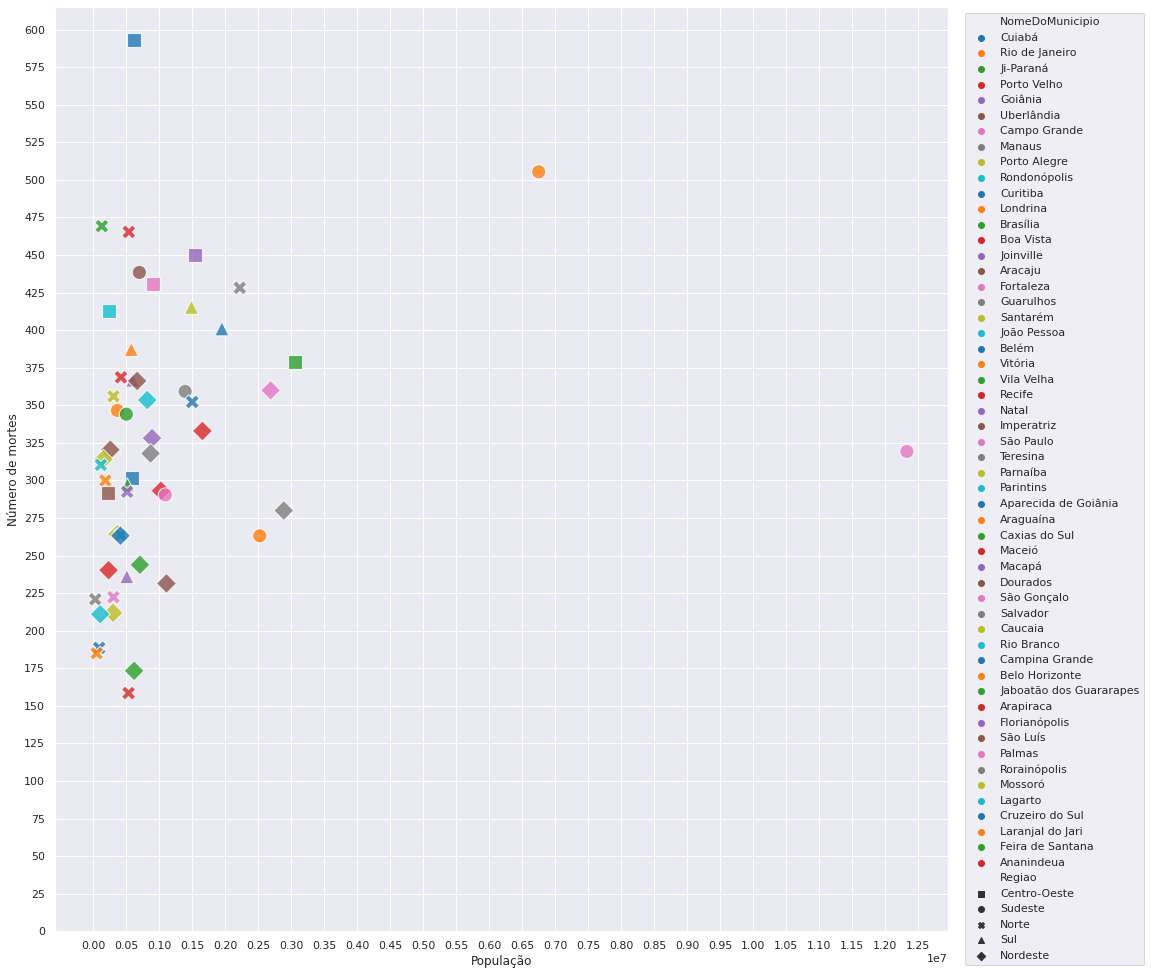

In [37]:
munreg = df.loc[:,['Weighted Death Rate per 100k', 'Regiao', 'NomeDoMunicipio', 'TotalHabitantes']].sort_values('Weighted Death Rate per 100k', ascending=False)

fig, ax = plt.subplots(figsize=(16, 17))

p = sns.scatterplot(data=munreg, x='TotalHabitantes', y='Weighted Death Rate per 100k',\
    hue='NomeDoMunicipio', style='Regiao', palette='tab10', s=200, alpha=0.8, markers=['s','o','X','^','D'])

p.set_yticks(range(0,625,25))
p.set_xticks(range(0,13000000,500000))
p.legend(loc='upper center', bbox_to_anchor=(1.12, 1.0))
p.set_xlabel('População')
p.set_ylabel('Número de mortes')

In [38]:
df['Tamanho do grupo de risco'] = \
    df.apply(lambda row: row['45 a 54 anos'] + row['55 a 64 anos'] \
        + row['65 a 74 anos'] \
        + row['75 anos ou mais'], axis=1)

df['Tamanho do grupo de jovens'] = \
    df.apply(lambda row: row['0 a 4 anos'] + row['5 a 14 anos'] + \
        row['15 a 24 anos'] + row['25 a 34 anos'] + row['35 a 44 anos'], axis=1)

Text(0.5, 0, 'Porcentagem da população dentro do grupo de risco')

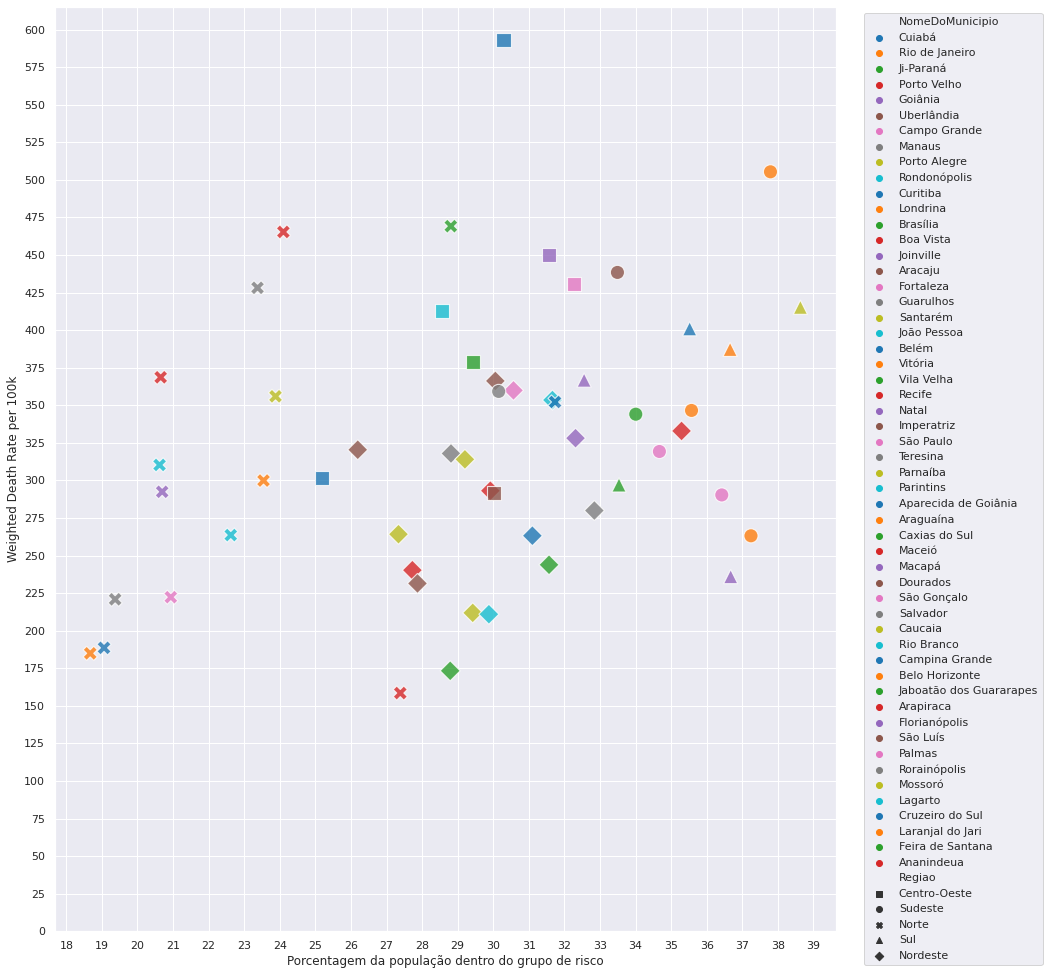

In [39]:
munreg_fxet = df.loc[:,['Weighted Death Rate per 100k', \
    'Regiao', 'NomeDoMunicipio', 'Tamanho do grupo de jovens', \
        'Tamanho do grupo de risco']]\
            .sort_values('Weighted Death Rate per 100k', ascending=False)


fig, ax = plt.subplots(figsize=(14, 17))

p = sns.scatterplot(data=munreg_fxet, x='Tamanho do grupo de risco', y='Weighted Death Rate per 100k',\
    hue='NomeDoMunicipio', style='Regiao', palette='tab10', alpha=0.8, s=200, markers=['s','o','X','^','D'])

p.set_yticks(range(0,625,25))
p.set_xticks(range(18,40,1))
p.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0))
p.set_xlabel('Porcentagem da população dentro do grupo de risco')

Text(0.5, 0, 'Porcentagem da população dentro do grupo mais resistente')

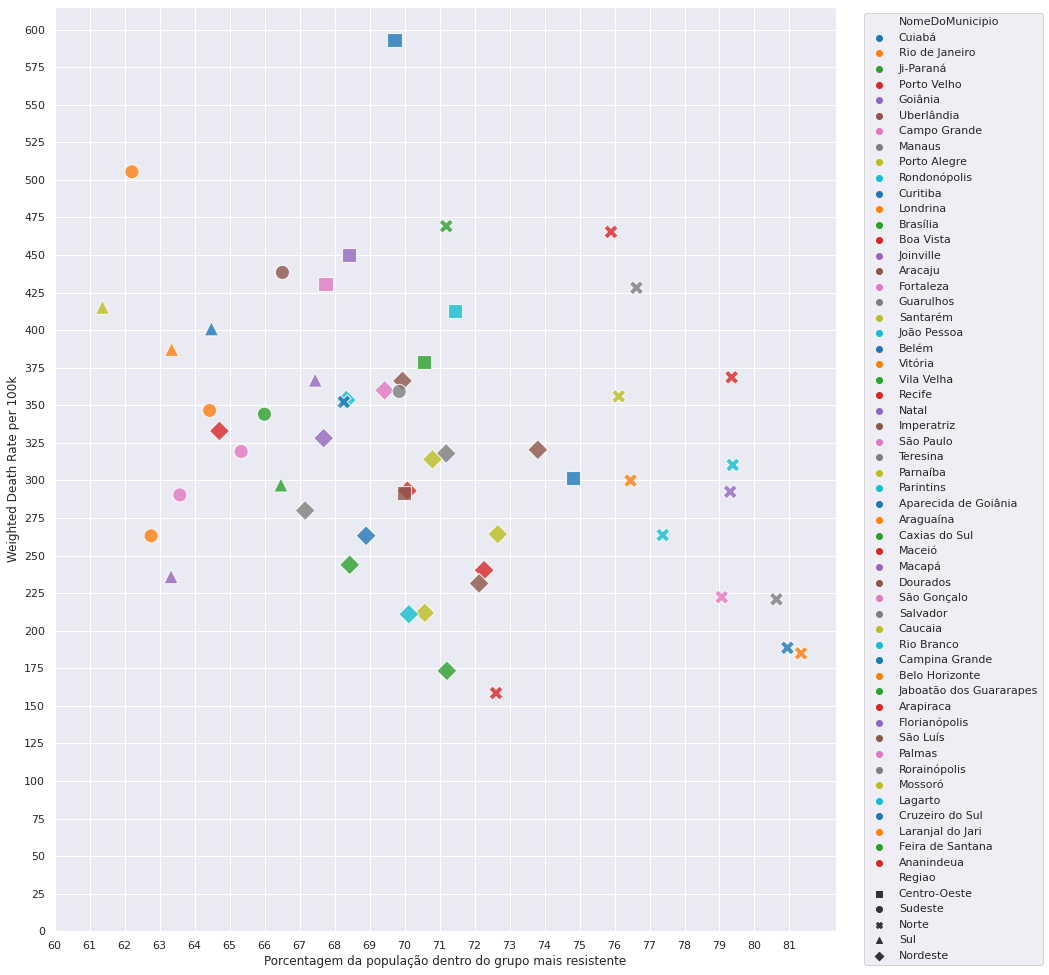

In [40]:
munreg_fxet = df.loc[:,['Weighted Death Rate per 100k', \
    'Regiao', 'NomeDoMunicipio', 'Tamanho do grupo de jovens', \
        'Tamanho do grupo de risco']]\
            .sort_values('Weighted Death Rate per 100k', ascending=False)


fig, ax = plt.subplots(figsize=(14, 17))

p = sns.scatterplot(data=munreg_fxet, x='Tamanho do grupo de jovens', y='Weighted Death Rate per 100k',\
    hue='NomeDoMunicipio', style='Regiao', palette='tab10', alpha=0.8, s=200, markers=['s','o','X','^','D'])

p.set_yticks(range(0,625,25))
p.set_xticks(range(60,82,1))
p.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0))
p.set_xlabel('Porcentagem da população dentro do grupo mais resistente')

In [41]:
# df.to_csv('../data/faixa_et_mortes.csv', index=False)